In [1]:
import pandas as pd
df = pd.read_csv('vgsales.csv')
print(df.shape)
df.head(10)

(16598, 11)


Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

Column defintions in README.md

## Data Preperation/Cleaning

In [2]:
# show number of null values
null_counts = df.isnull().sum()
null_counts

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [3]:
#drop null values
df = df.dropna()

print(df.shape)
df.head()

(16291, 11)


Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
# number of entries for each year
value_counts = df['Year'].value_counts()
print(value_counts)

Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [5]:
# describe to find min and max values for year
df['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [6]:
# drop entries from before 2000 and after 2015
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2015)]
df.shape

(13971, 11)

In [7]:
df.dtypes


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
df['Year'] = df['Year'].astype(int)

df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Initial Visualizations

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

You have to enable the VegaFusion data transformer to address the MaxRowsError from trying to create a chart from data that has more than 5000 rows. You'll likely need to install VegaFusion-- you can use either pip or conda. I had some trouble with this, but the commands that worked for me were:

`pip install vegafusion vegafusion-jupyter`

`pip install "vegafusion[embed]>=1.5.0"`

More information is available on the Altair documentation [here](https://altair-viz.github.io/user_guide/large_datasets.html)
___

In [11]:
# bar chart of genre sales divided by regions:
regions_bars = alt.Chart(df).mark_bar().transform_fold(
  ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
  as_=['region', 'sales']
).encode(
  x = alt.X('Genre:N', title = 'Game Genre', sort = alt.EncodingSortField(field='Global_Sales', op='sum', order='descending')),
  y = alt.Y('sales:Q', title = 'Video Game Sales (in millions)'),
  xOffset=alt.XOffset('region:N'),
  color = alt.Color('region:N'),
  # tooltip = alt.Tooltip(['Genre', 'region:N', 'sales:Q']) -> I want this to show the sales value as the y value of the bar
).properties(
  title = 'Side-by-side bar chart of video game sales by genre for different regions, 2000 - 2015',
  width = 1200
)

# bar chart of genre sales, globally
global_bars = alt.Chart(df).mark_bar(size = 50).encode(
  x = alt.X('Genre:N', title = 'Game Genre', sort = '-y'),
  y = alt.Y('Global_Sales:Q', title = 'Global Sales (in millions)')
).properties(
  title = 'Bar chart of global video game sales by genre, 2000 - 2015',
  width = 1200
)

# display them on top of each other
regions_bars & global_bars


alt.VConcatChart(...)

These are static bar charts depicting sales in millions by genre. The top bar chart is a side-by-side bar chart showing video game sales in millions for different genres, with the different colored bars representing different market regions: Europe, Japan, North America, and all sales in all other regions. The chart below is video game sales by genre, globally. The genres on both charts are sorted in descending order by global sales. We can see that:
- North America seems to dominate sales, being the region with the most sales for every genre.
- For most genres, North American sales are significantly higher than every other region, with the exception of Role-Playing, where Japanese sales are very close in count

**ToDo: Add dropdown interaction to choose year, add check mark option to choose which regions are shown**

___

Seaborn default result for a line chart with global sales over time, hue parameter set to the developer (dataset filtered to only include the top five developers). I don't love this, we definitley need to perform some sort of aggregation (the shading indicating range is distracting)

Index(['Electronic Arts', 'Activision', 'Ubisoft', 'Namco Bandai Games',
       'Konami Digital Entertainment'],
      dtype='object', name='Publisher')


Text(0, 0.5, 'Global Sales (Millions)')

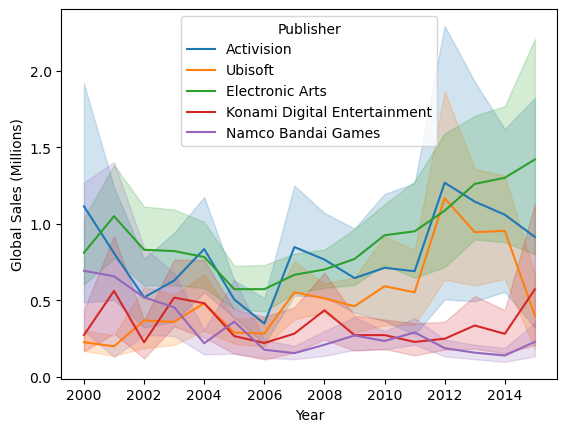

In [12]:
top_five_publishers = df['Publisher'].value_counts().nlargest(5).index
print(top_five_publishers)

df_top_pub = df[df['Publisher'].isin(top_five_publishers)]

sns.lineplot(data=df_top_pub, x='Year', y='Global_Sales', hue='Publisher')
plt.ylabel('Global Sales (Millions)')

<Axes: xlabel='Year', ylabel='Count'>

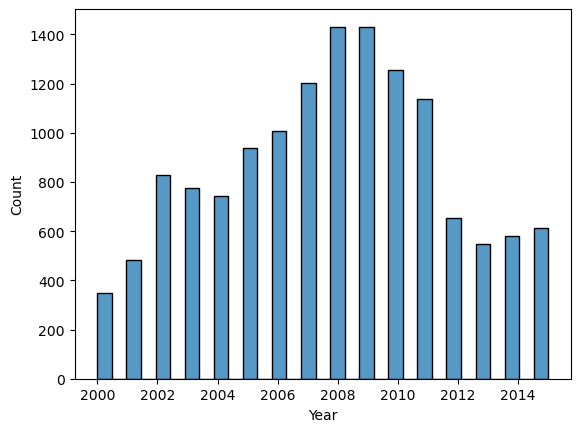

In [13]:
sns.histplot(data=df, x=df['Year'])